# Task: Prediction using Supervised ML


## Description: Predict percentage on basis of studying hours using Simple Linear Regression

### Author: Aditya Gujar

*Import all the required Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

*Load the Dataset*

In [2]:
#Reading Data
url = "http://bit.ly/w-data"
data_set = pd.read_csv(url)
print("Data imported successfully")

data_set.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


From the above table, let's plot our data points on 2-D graph using following script:

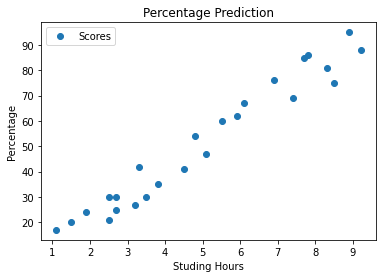

In [5]:
# Plotting the distribution of scores
data_set.plot(x='Hours', y='Scores', style='o')
plt.title('Percentage Prediction')
plt.xlabel('Studing Hours')
plt.ylabel('Percentage')
plt.show()

**From the above graph, a positive linear relationship between the number of hours studied and percentage score can be seen**

### Data Preparation

In the next step we dived the data into "attributes"(independent variable) and labels(dependent variable). Here we take X as "Hours" i.e. independent variable and y as "Scores" i.e. is dependent variable.

In [6]:
X = data_set.iloc[:, :-1].values  
y = data_set.iloc[:,1].values  

Now by using Scikit-Learn's built in train_test_split() method we can split the data into training and testing sets:

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm

Fit Simple Regression method to training set and disply "intercept" and "coefficient" values:

In [8]:
from sklearn.linear_model import LinearRegression  
L_regressor = LinearRegression()  
L_regressor.fit(X_train, y_train) 

print(L_regressor.intercept_)
print(L_regressor.coef_)

2.018160041434683
[9.91065648]


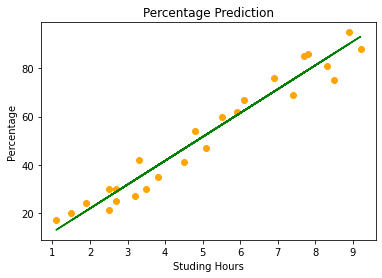

In [12]:
# Plotting the regression line
line = L_regressor.coef_*X+L_regressor.intercept_

# Plotting the actual data points for the training and testing data
plt.scatter(X, y, color='orange')
plt.plot(X, line, color='green')
plt.title('Percentage Prediction')
plt.xlabel('Studing Hours')
plt.ylabel('Percentage')
plt.show()

### Predictions

Now after the algorithm has been trained, we can make some predictions.

In [13]:
print(X_test) # Testing data - In Hours
y_pred = L_regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
#Comparing actual and predicted data and ploting it on a graph
y_pred = L_regressor.predict(X_test)
d_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
d_frame

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

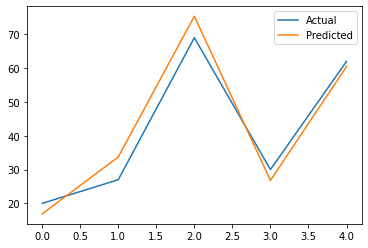

In [16]:
d_frame.plot()

### New predictions with own data

In [17]:
new_scores_pred = L_regressor.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is {}".format(new_scores_pred))

The predicted score if a student studies for 9.25 hrs/ day is [93.69173249]


### Evaluating the model

In the final step we evaluate the performance of algorithm using:

* Mean Absolute Error (MAE): Mean of the absolute value of the errors. 

* Mean Squared Error (MSE): Mean of the squared errors.

* Root Mean Squared Error (RMSE): Square root of the mean of the squared errors.


In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
